# convolutional neral network with cat_dog data 

 dataset link https://www.kaggle.com/datasets/tongpython/cat-and-dog/data

In [23]:
import os
import pathlib
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
tf.random.set_seed(42)

from PIL import Image, ImageOps
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0)
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0)

In [24]:
train_data = train_datagen.flow_from_directory(
    directory='C:/dataset/PetImages',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=64,
    seed=42
)

Found 25000 images belonging to 2 classes.


In [6]:
first_batch = train_data.next()

In [7]:
first_batch

(array([[[[0.27450982, 0.16470589, 0.07843138],
          [0.28235295, 0.17254902, 0.08627451],
          [0.28235295, 0.17254902, 0.08627451],
          ...,
          [0.01960784, 0.01960784, 0.01960784],
          [0.03137255, 0.03137255, 0.02352941],
          [0.03137255, 0.03137255, 0.02352941]],
 
         [[0.28235295, 0.17254902, 0.08627451],
          [0.2901961 , 0.18039216, 0.09411766],
          [0.29411766, 0.18431373, 0.09803922],
          ...,
          [0.01960784, 0.01960784, 0.01960784],
          [0.02352941, 0.02352941, 0.01568628],
          [0.02745098, 0.02745098, 0.01960784]],
 
         [[0.2784314 , 0.16862746, 0.08235294],
          [0.28627452, 0.1764706 , 0.09019608],
          [0.28627452, 0.1764706 , 0.09019608],
          ...,
          [0.02352941, 0.02352941, 0.02352941],
          [0.02352941, 0.02352941, 0.01568628],
          [0.02352941, 0.02352941, 0.01568628]],
 
         ...,
 
         [[0.18823531, 0.14901961, 0.10196079],
          [0.19215

In [8]:
first_batch[0].shape, first_batch[1].shape

((64, 224, 224, 3), (64, 2))

In [9]:
def visualize_batch(batch: tf.keras.preprocessing.image.DirectoryIterator):
    n = 64
    num_row, num_col = 8, 8
    fig, axes = plt.subplots(num_row, num_col, figsize=(3 * num_col, 3 * num_row))
    
    for i in range(n):
        img = np.array(batch[0][i] * 255, dtype='uint8')
        ax = axes[i // num_col, i % num_col]
        ax.imshow(img)
        
    plt.tight_layout()
    plt.show()

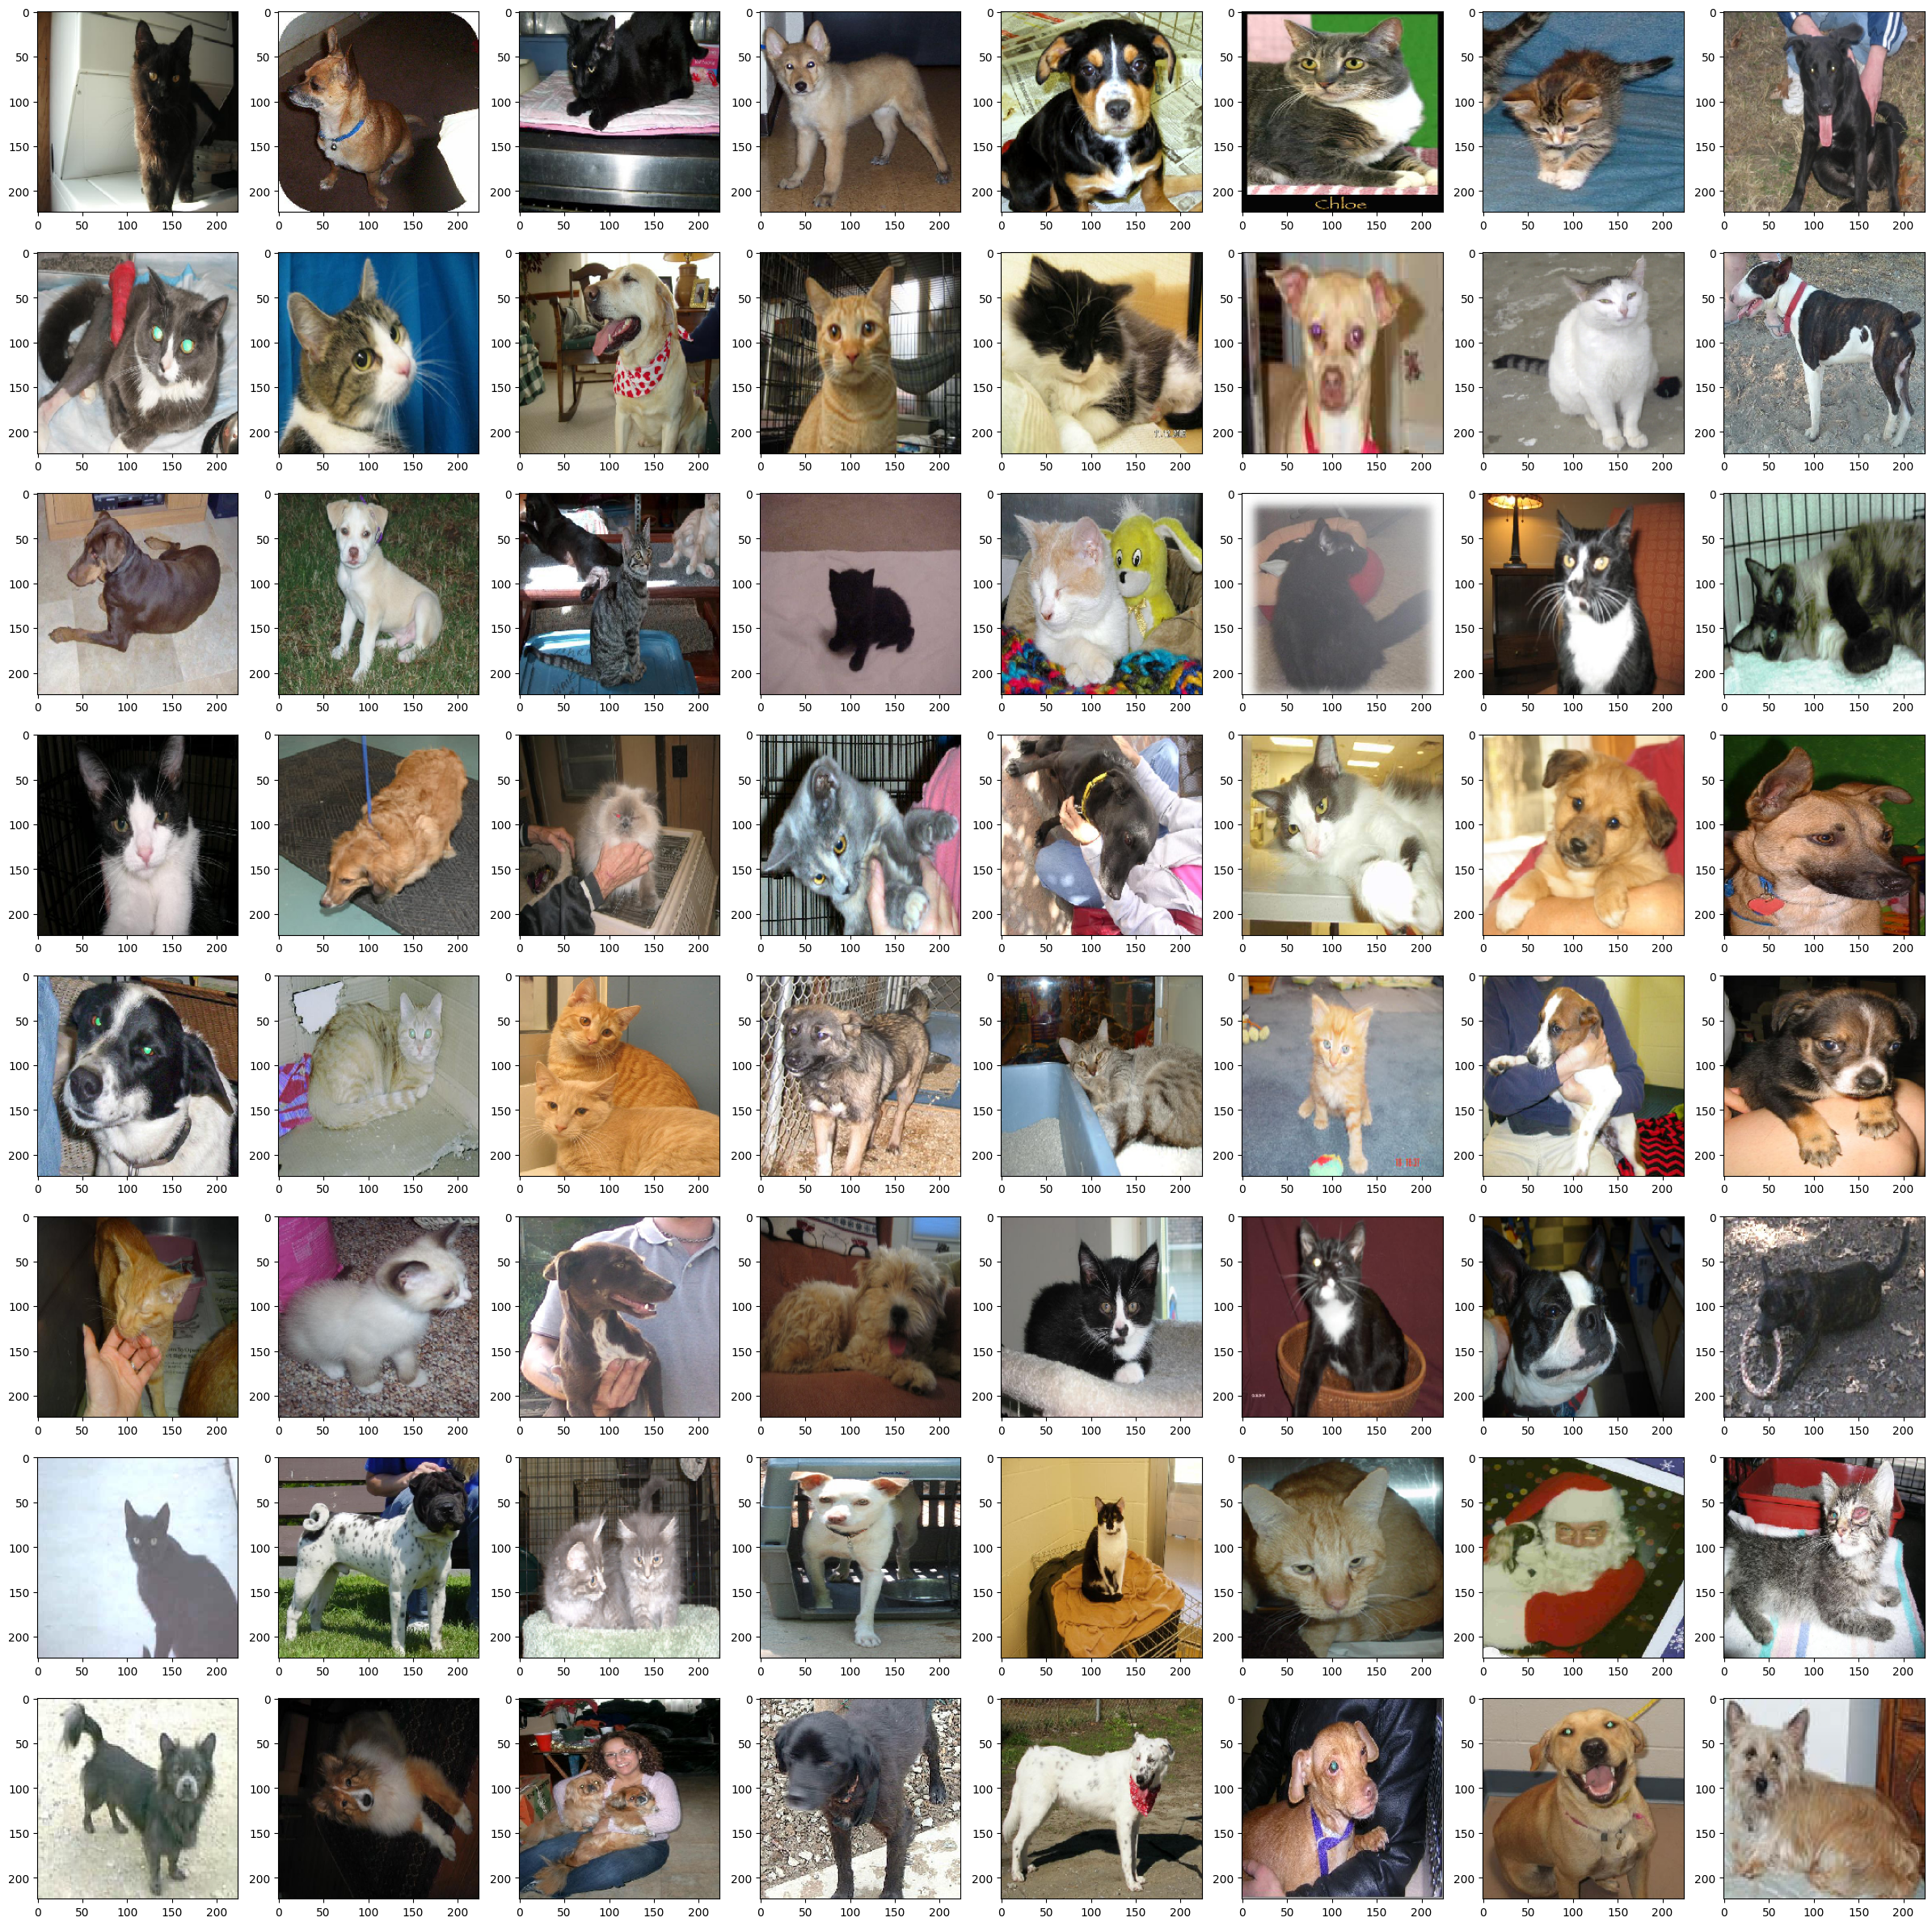

In [10]:
visualize_batch(batch=first_batch)

In [42]:
class ValidatingImageDataGenerator(tf.keras.preprocessing.image.ImageDataGenerator):
    def _get_batches_of_transformed_samples(self, index_array):
        # Get the batch of images using the parent method
        batch_x = super()._get_batches_of_transformed_samples(index_array)
        
        valid_batch_x = []
        for img_array in batch_x:
            try:
                # Attempt to load the image using PIL to validate it
                img = Image.fromarray(img_array.astype('uint8'))  # Convert numpy array to image
                img.verify()  # This will throw an error for invalid images
                valid_batch_x.append(img_array)  # If valid, add it to the batch
            except (IOError, SyntaxError) as e:
                print("Skipping invalid image.")
        
        return tf.convert_to_tensor(valid_batch_x)  # Return only valid images as a tensor




In [50]:
image_dir ='C:/dataset/PetImages'  # Path to  dataset


for root, dirs, files in os.walk(image_dir):
    for file in files:
        file_path = os.path.join(root, file)
        try:
            img = Image.open(file_path)
            img.verify()  # Check if the image is valid
        except (IOError, SyntaxError) as e:
            print(f"Bad file found: {file_path}, Error: {e}")

Bad file found: C:/dataset/PetImages\Cat\666.jpg, Error: cannot identify image file 'C:/dataset/PetImages\\Cat\\666.jpg'
Bad file found: C:/dataset/PetImages\Cat\Thumbs.db, Error: cannot identify image file 'C:/dataset/PetImages\\Cat\\Thumbs.db'
Bad file found: C:/dataset/PetImages\Dog\11702.jpg, Error: cannot identify image file 'C:/dataset/PetImages\\Dog\\11702.jpg'
Bad file found: C:/dataset/PetImages\Dog\Thumbs.db, Error: cannot identify image file 'C:/dataset/PetImages\\Dog\\Thumbs.db'


In [ ]:
train_datagen = ValidatingImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2,
)

In [52]:
train_data = train_datagen.flow_from_directory(
    directory='C:/dataset/PetImages',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=64,
    seed=42,
     subset='training'
)

Found 20000 images belonging to 2 classes.


In [53]:
valid_data = train_datagen.flow_from_directory(
    directory='C:/dataset/PetImages',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=64,
    seed=42,
    subset='validation'
)

Found 4998 images belonging to 2 classes.


In [54]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), input_shape=(224, 224, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])



In [56]:
model_1.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')]
)



In [57]:
history_1 = model_1.fit(
    train_data,
    validation_data=valid_data,
    epochs=10
)

Epoch 1/10
313/313 [==============================] - 567s 2s/step - loss: 1.5435 - accuracy: 0.5811 - val_loss: 0.6364 - val_accuracy: 0.6377
Epoch 2/10
313/313 [==============================] - 564s 2s/step - loss: 0.6435 - accuracy: 0.6368 - val_loss: 0.6327 - val_accuracy: 0.6423
Epoch 3/10
313/313 [==============================] - 569s 2s/step - loss: 0.6331 - accuracy: 0.6459 - val_loss: 0.6198 - val_accuracy: 0.6517
Epoch 4/10
313/313 [==============================] - 567s 2s/step - loss: 0.6177 - accuracy: 0.6636 - val_loss: 0.6275 - val_accuracy: 0.6603
Epoch 5/10
313/313 [==============================] - 569s 2s/step - loss: 0.6089 - accuracy: 0.6654 - val_loss: 0.5964 - val_accuracy: 0.6837
Epoch 6/10
313/313 [==============================] - 567s 2s/step - loss: 0.6043 - accuracy: 0.6696 - val_loss: 0.6002 - val_accuracy: 0.6817
Epoch 7/10
313/313 [==============================] - 574s 2s/step - loss: 0.5990 - accuracy: 0.6731 - val_loss: 0.5905 - val_accuracy: 0.6887

In [58]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

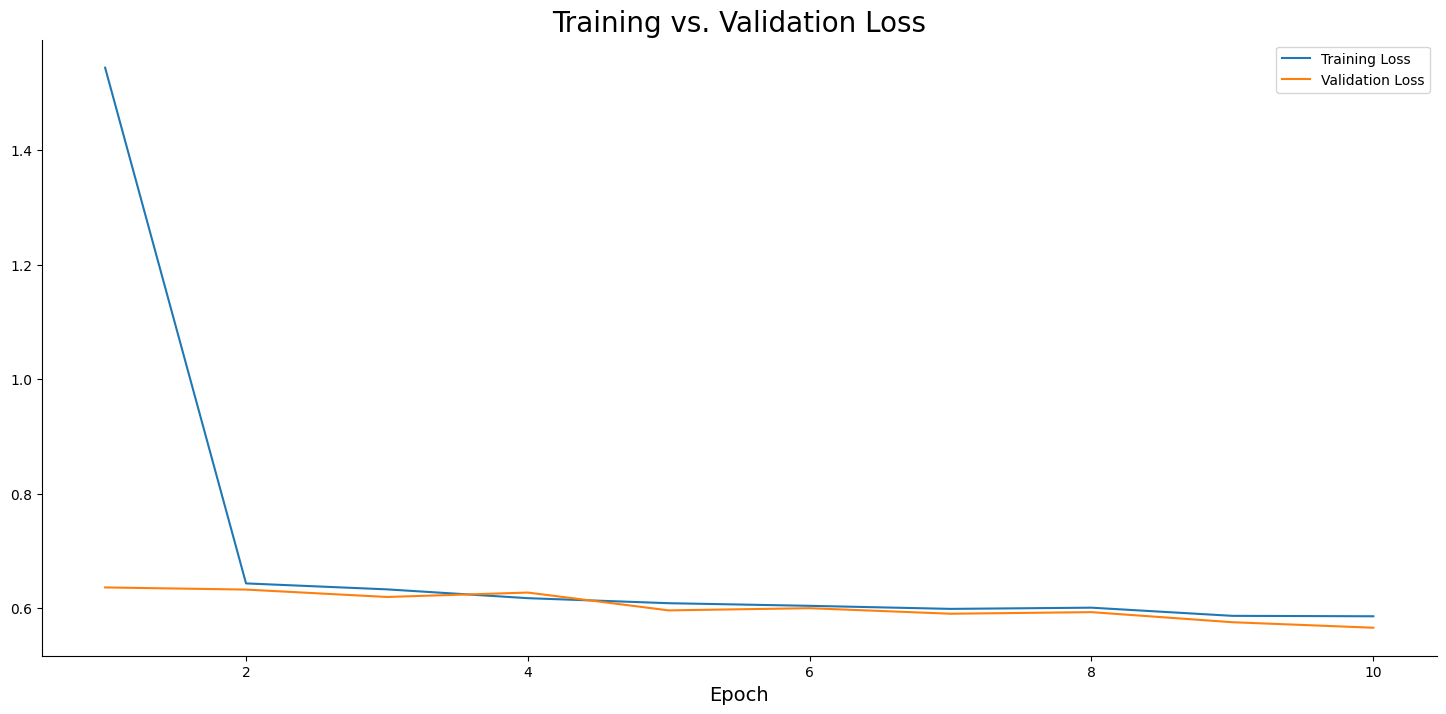

In [61]:
plt.plot(np.arange(1, 11), history_1.history['loss'], label='Training Loss')
plt.plot(np.arange(1, 11), history_1.history['val_loss'], label='Validation Loss')
plt.title('Training vs. Validation Loss', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

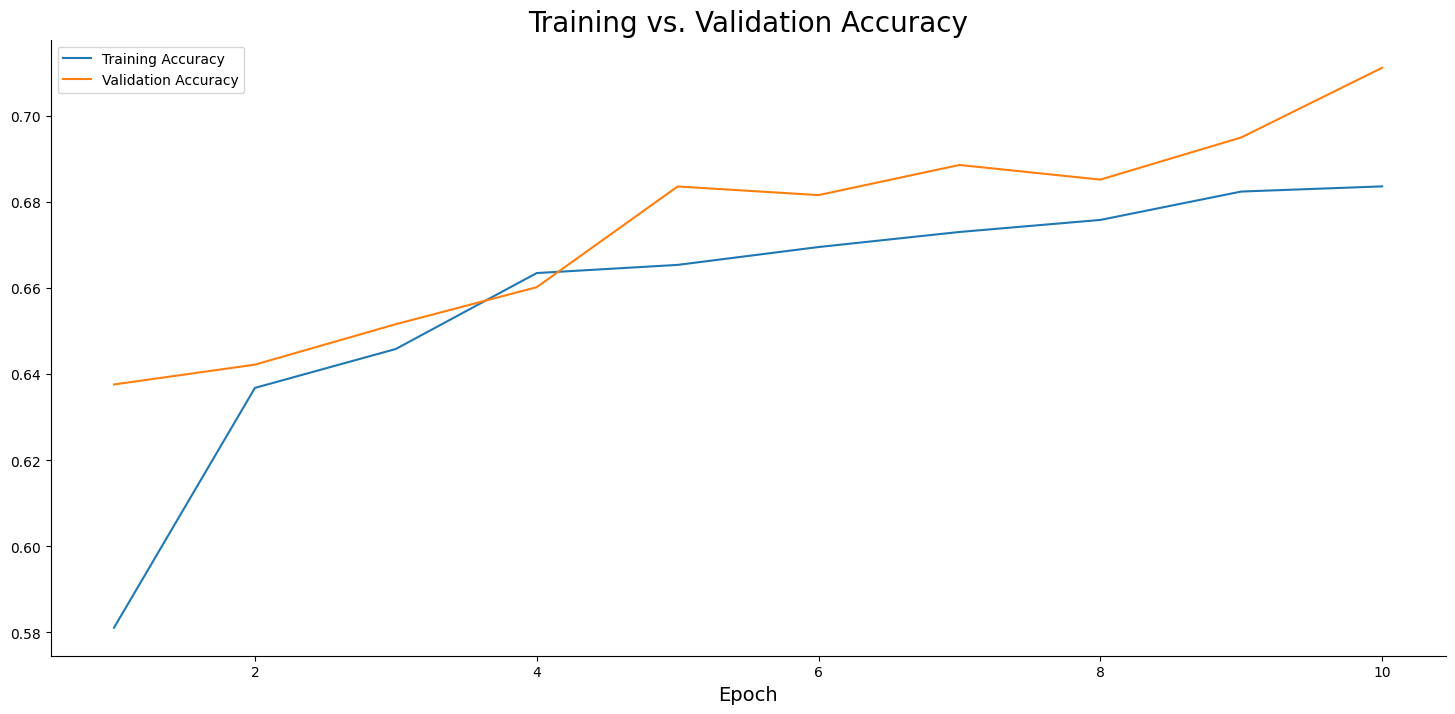

In [63]:
plt.plot(np.arange(1, 11), history_1.history['accuracy'], label='Training Accuracy')
plt.plot(np.arange(1, 11), history_1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs. Validation Accuracy', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

In [66]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), input_shape=(224, 224, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

In [67]:
model_2.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')]
)

In [68]:
history_2 = model_2.fit(
    train_data,
    validation_data=valid_data,
    epochs=100
)

Epoch 1/100
313/313 [==============================] - 836s 3s/step - loss: 0.7418 - accuracy: 0.5701 - val_loss: 0.6581 - val_accuracy: 0.5956
Epoch 2/100
313/313 [==============================] - 839s 3s/step - loss: 0.6380 - accuracy: 0.6387 - val_loss: 0.6192 - val_accuracy: 0.6653
Epoch 3/100
313/313 [==============================] - 839s 3s/step - loss: 0.6011 - accuracy: 0.6758 - val_loss: 0.5935 - val_accuracy: 0.6847
Epoch 4/100
313/313 [==============================] - 832s 3s/step - loss: 0.5649 - accuracy: 0.7056 - val_loss: 0.5603 - val_accuracy: 0.7129
Epoch 5/100
313/313 [==============================] - 829s 3s/step - loss: 0.5527 - accuracy: 0.7154 - val_loss: 0.5298 - val_accuracy: 0.7439
Epoch 6/100
313/313 [==============================] - 828s 3s/step - loss: 0.5378 - accuracy: 0.7285 - val_loss: 0.5374 - val_accuracy: 0.7355
Epoch 7/100
313/313 [==============================] - 830s 3s/step - loss: 0.5267 - accuracy: 0.7382 - val_loss: 0.5223 - val_accuracy:

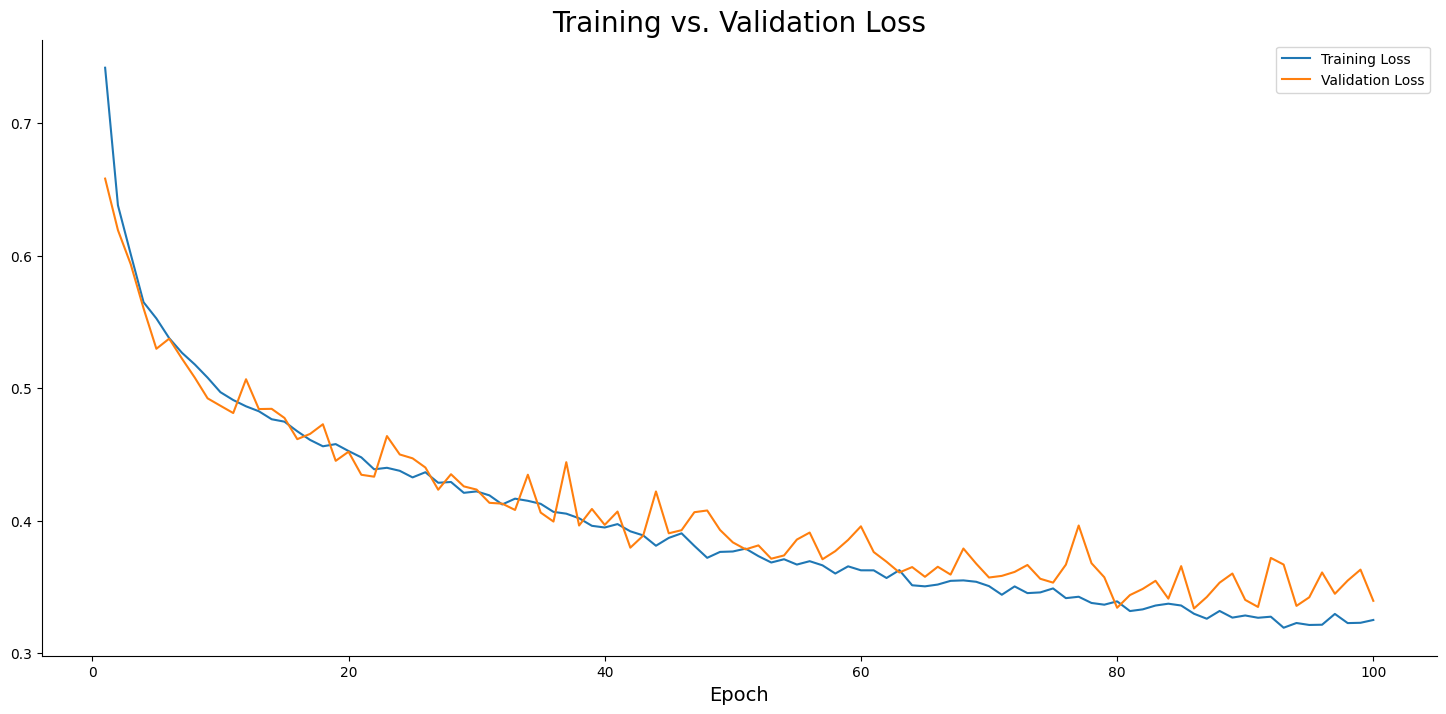

In [71]:
plt.plot(np.arange(1, 101), history_2.history['loss'], label='Training Loss')
plt.plot(np.arange(1, 101), history_2.history['val_loss'], label='Validation Loss')
plt.title('Training vs. Validation Loss', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

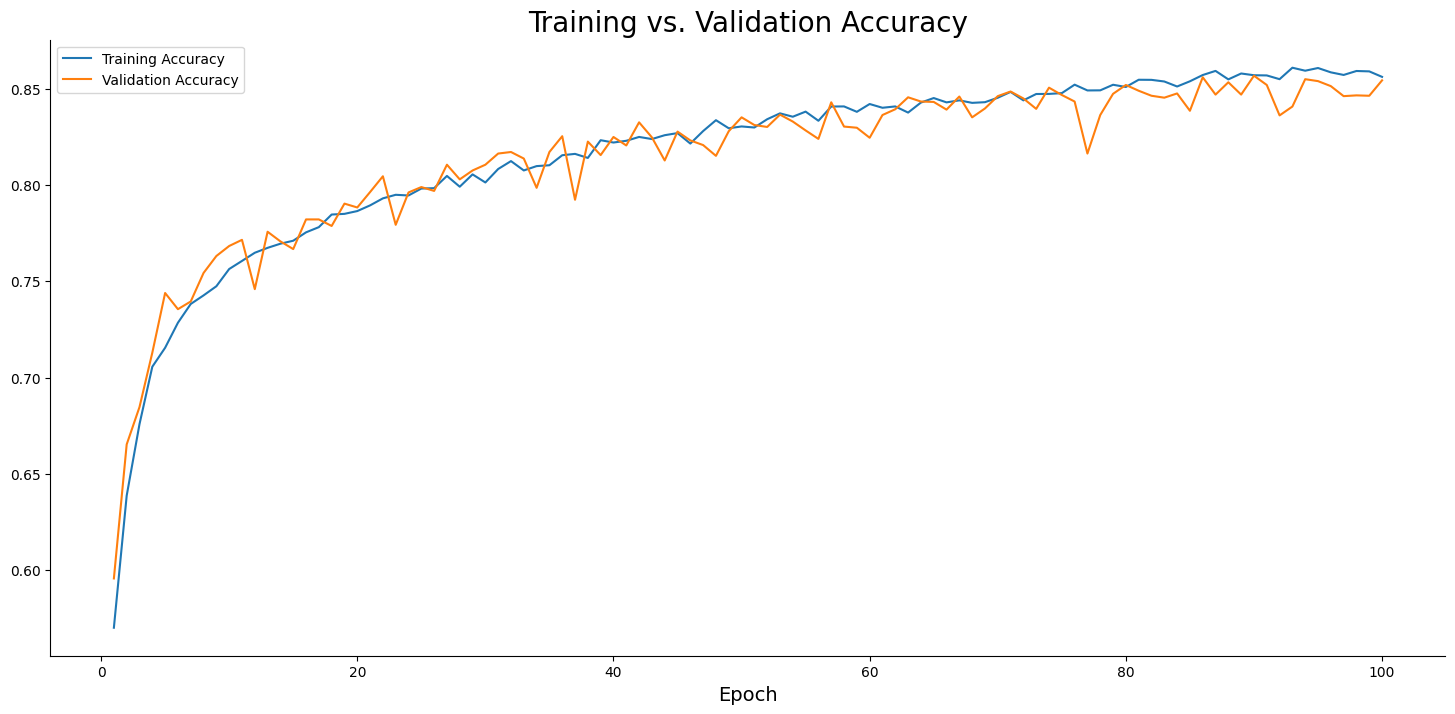

In [72]:
plt.plot(np.arange(1, 101), history_2.history['accuracy'], label='Training Accuracy')
plt.plot(np.arange(1, 101), history_2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs. Validation Accuracy', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

In [73]:
def prepare_single_image(img_path: str) -> np.array:
    img = Image.open(img_path)
    img = img.resize(size=(224, 224))
    return np.array(img) / 255.0

In [77]:
single_image = prepare_single_image(img_path='C:/dataset/PetImages/Cat/1001.jpg')
single_image

array([[[0.22352941, 0.20784314, 0.03137255],
        [0.22745098, 0.2       , 0.05098039],
        [0.23137255, 0.19607843, 0.0745098 ],
        ...,
        [0.13333333, 0.1372549 , 0.11372549],
        [0.08235294, 0.08627451, 0.06666667],
        [0.08627451, 0.09019608, 0.0745098 ]],

       [[0.2       , 0.18431373, 0.01568627],
        [0.20784314, 0.18039216, 0.03137255],
        [0.21176471, 0.17647059, 0.05490196],
        ...,
        [0.15294118, 0.1254902 , 0.07058824],
        [0.11764706, 0.08235294, 0.03529412],
        [0.14117647, 0.10980392, 0.0627451 ]],

       [[0.20784314, 0.18823529, 0.02745098],
        [0.20784314, 0.17647059, 0.03529412],
        [0.20392157, 0.16470588, 0.05098039],
        ...,
        [0.21568627, 0.16862745, 0.09803922],
        [0.3372549 , 0.27843137, 0.21176471],
        [0.27843137, 0.21568627, 0.14901961]],

       ...,

       [[0.19215686, 0.65490196, 0.41568627],
        [0.19215686, 0.65490196, 0.41568627],
        [0.19215686, 0

In [94]:
single_image = prepare_single_image(img_path='C:/dataset/PetImages/Cat/193.jpg')
single_prediction = model_2.predict(single_image.reshape(-1, 224, 224, 3))
single_prediction

1/1 [==============================] - 0s 37ms/step


array([[0.989461  , 0.01053896]], dtype=float32)

In [95]:
single_prediction.argmax()

0

In [96]:
single_image = prepare_single_image(img_path='C:/dataset/PetImages/Dog/121.jpg')
single_prediction = model_2.predict(single_image.reshape(-1, 224, 224, 3))
single_prediction

1/1 [==============================] - 0s 38ms/step


array([[0.01491856, 0.9850815 ]], dtype=float32)

In [97]:
single_prediction.argmax()

1